# Decision Tree and Random Forest

Classification of beans in species using Decision Tree and Random Forest with imbalanced and balanced (oversampled) data.

In [38]:
# Installing dependencies
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
# Fetching dataset
with open('dry_bean_dataset.pkl', 'rb') as file:
    dry_bean_dataset = pickle.load(file)

In [40]:
# Splitting dataset in training (70%) and test (30%) subsets
X_train, X_test, y_train, y_test = train_test_split(dry_bean_dataset.data.features, dry_bean_dataset.data.targets, test_size=0.3, random_state=42)
y_train = np.ravel(y_train)

### Decision Tree with imbalanced classes

In [41]:
# Defining the hyperparameter distribution for random search
param_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'sqrt', 'log2']}

In [42]:
# Optimizing the hyperparameters
tree_clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_dt, n_iter=100, cv=5, scoring='f1_weighted', random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)
print("Best hyperparameters found:", random_search.best_params_)

Best hyperparameters found: {'criterion': 'log_loss', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 13}


In [43]:
# Evaluating the optimal decision tree
best_clf = random_search.best_estimator_
y_pred_dt = best_clf.predict(X_test)
precision = round(precision_score(y_test, y_pred_dt, average='weighted'), 4)
recall = round(recall_score(y_test, y_pred_dt, average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred_dt, average='weighted'), 4)
accuracy = round(accuracy_score(y_test, y_pred_dt), 4)

results_df = pd.DataFrame(index = ['Precision', 'Recall', 'F1 score', 'Accuracy'])
results_df['DT'] = [precision, recall, f1, accuracy]
results_df

,DT
Precision,0.9082
Recall,0.9079
F1 score,0.9080
Accuracy,0.9079


In [44]:
# Evaluating the model by classes
results_df_class = pd.DataFrame(columns = sorted(set(y_test['Class'])))
results_df_class.loc['Precision'] = np.around(precision_score(y_test, y_pred_dt, average=None), decimals = 4)
results_df_class.loc['Recall'] = np.around(recall_score(y_test, y_pred_dt, average=None), decimals = 4)
results_df_class.loc['F1 score'] = np.around(f1_score(y_test, y_pred_dt, average=None), decimals = 4)
results_df_class

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Precision,0.9026,1.0,0.9032,0.9093,0.9442,0.9310,0.8511
Recall,0.8889,1.0,0.9070,0.9136,0.9186,0.9385,0.8607
F1 score,0.8957,1.0,0.9051,0.9115,0.9313,0.9347,0.8559


### Random Forest with imbalanced classes

In [45]:
# Defining the hyperparameter distribution for random search
param_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'bootstrap': [True, False]}

In [46]:
# Optimizing the hyperparameters
rf_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_rf, n_iter=100, cv=5, scoring='f1_weighted', random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)
print("Best hyperparameters found:", random_search.best_params_)

Best hyperparameters found: {'bootstrap': True, 'criterion': 'log_loss', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 200}


In [47]:
# Evaluating the optimal random forest
best_rf_clf = random_search.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)
precision = round(precision_score(y_test, y_pred_rf, average='weighted'), 4)
recall = round(recall_score(y_test, y_pred_rf, average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred_rf, average='weighted'), 4)
accuracy = round(accuracy_score(y_test, y_pred_rf), 4)

results_df['RF'] = [precision, recall, f1, accuracy]
results_df

,DT,RF
Precision,0.9082,0.9225
Recall,0.9079,0.9225
F1 score,0.9080,0.9224
Accuracy,0.9079,0.9225


In [48]:
# Evaluating the model by classes
results_df_class = pd.DataFrame(columns = sorted(set(y_test['Class'])))
results_df_class.loc['Precision'] = np.around(precision_score(y_test, y_pred_rf, average=None), decimals = 4)
results_df_class.loc['Recall'] = np.around(recall_score(y_test, y_pred_rf, average=None), decimals = 4)
results_df_class.loc['F1 score'] = np.around(f1_score(y_test, y_pred_rf, average=None), decimals = 4)
results_df_class

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Precision,0.9184,1.0,0.9403,0.9123,0.9545,0.9435,0.8733
Recall,0.9091,1.0,0.9323,0.9277,0.9494,0.9450,0.8645
F1 score,0.9137,1.0,0.9363,0.9199,0.9519,0.9442,0.8689


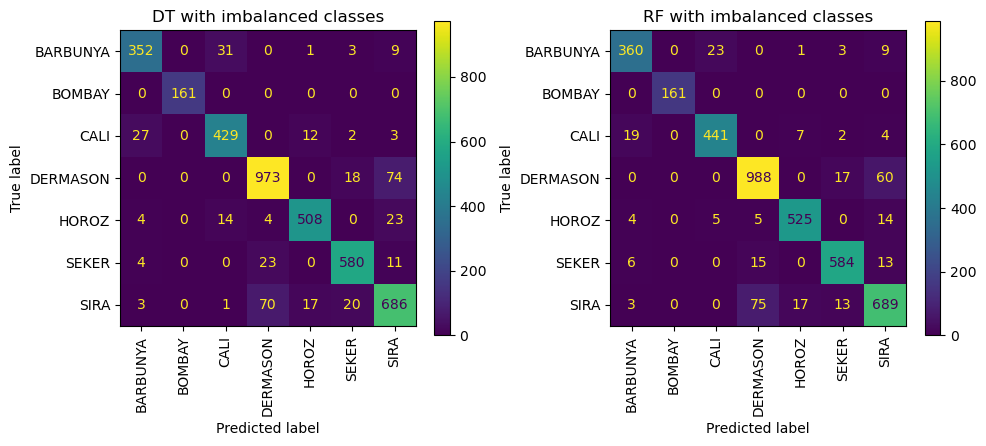

In [49]:
# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 16))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test['Class'])))
disp.plot(ax=axes[0], colorbar = False)
axes[0].set_title('DT with imbalanced classes')
axes[0].tick_params(axis='x', rotation=90)
plt.colorbar(disp.im_, ax=axes[0], shrink=0.2)

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test['Class'])))
disp.plot(ax=axes[1], colorbar = False)
axes[1].set_title('RF with imbalanced classes')
axes[1].tick_params(axis='x', rotation=90)
plt.colorbar(disp.im_, ax=axes[1], shrink=0.2)

plt.tight_layout()
plt.show()

### Decision Tree with balanced classes

Oversampling is a method to overcome class imbalance; data in small classes is increased by randomly doubling existing data.

In [50]:
# Oversampling classes
class_counts = dry_bean_dataset.data.original['Class'].value_counts()
print('Before oversampling:')
print(class_counts)
class_max = class_counts.idxmax()

for class_min in class_counts.index: # Oversampling each class
    class_ratio = class_counts[class_max] / class_counts[class_min]
    class_samples = dry_bean_dataset.data.original[dry_bean_dataset.data.original['Class'] == class_min]
    class_oversampled = class_samples.sample(n=int(len(class_samples) * (class_ratio - 1)), replace=True)
    dry_bean_dataset.data.original = pd.concat([dry_bean_dataset.data.original, class_oversampled], axis = 0)

dry_bean_dataset.data.original = dry_bean_dataset.data.original.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffling the data
dry_bean_dataset.data.features = dry_bean_dataset.data.original.iloc[:,:-1]
dry_bean_dataset.data.targets = dry_bean_dataset.data.original['Class'].to_frame(name = 'Class')
print('\nAfter oversampling:')
dry_bean_dataset.data.original['Class'].value_counts()

Before oversampling:
Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

After oversampling:


Class
SEKER       3546
BARBUNYA    3546
BOMBAY      3546
DERMASON    3546
HOROZ       3546
CALI        3545
SIRA        3545
Name: count, dtype: int64

In [54]:
# AGAIN finding, training and evaluating the optimal model
X_train, X_test, y_train, y_test = train_test_split(dry_bean_dataset.data.features, dry_bean_dataset.data.targets, test_size=0.3, random_state=42)
y_train = np.ravel(y_train)

tree_clf = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(tree_clf, param_distributions=param_dt, n_iter=100, cv=5, scoring='f1_weighted', random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)
print("Best hyperparameters found:", random_search.best_params_)

best_clf = random_search.best_estimator_
y_pred_dt = best_clf.predict(X_test)
precision = round(precision_score(y_test, y_pred_dt, average='weighted'), 4)
recall = round(recall_score(y_test, y_pred_dt, average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred_dt, average='weighted'), 4)
accuracy = round(accuracy_score(y_test, y_pred_dt), 4)

results_df['DF + oversampling'] = [precision, recall, f1, accuracy]
results_df

Best hyperparameters found: {'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


,DT,RF,DF + oversampling
Precision,0.9082,0.9225,0.9513
Recall,0.9079,0.9225,0.9511
F1 score,0.9080,0.9224,0.9511
Accuracy,0.9079,0.9225,0.9511


In [52]:
# Evaluating the model by classes
results_df_class = pd.DataFrame(columns = sorted(set(y_test['Class'])))
results_df_class.loc['Precision'] = np.around(precision_score(y_test, y_pred_dt, average=None), decimals = 4)
results_df_class.loc['Recall'] = np.around(recall_score(y_test, y_pred_dt, average=None), decimals = 4)
results_df_class.loc['F1 score'] = np.around(f1_score(y_test, y_pred_dt, average=None), decimals = 4)
results_df_class

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Precision,0.9739,1.0,0.9690,0.9191,0.9651,0.9524,0.8788
Recall,0.9658,1.0,0.9735,0.8764,0.9623,0.9656,0.9102
F1 score,0.9699,1.0,0.9712,0.8972,0.9637,0.9590,0.8942


### Random Forest with balanced classes

In [55]:
# AGAIN finding, training and evaluating the optimal model
rf_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_rf, n_iter=100, cv=5, scoring='f1_weighted', random_state=42, n_jobs = -1)
random_search.fit(X_train, y_train)
print("Best hyperparameters found:", random_search.best_params_)

best_rf_clf = random_search.best_estimator_
y_pred_rf = best_rf_clf.predict(X_test)
precision = round(precision_score(y_test, y_pred_rf, average='weighted'), 4)
recall = round(recall_score(y_test, y_pred_rf, average='weighted'), 4)
f1 = round(f1_score(y_test, y_pred_rf, average='weighted'), 4)
accuracy = round(accuracy_score(y_test, y_pred_rf), 4)

results_df['RF + oversampling'] = [precision, recall, f1, accuracy]
results_df

Best hyperparameters found: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 179}


,DT,RF,DF + oversampling,RF + oversampling
Precision,0.9082,0.9225,0.9513,0.9663
Recall,0.9079,0.9225,0.9511,0.9663
F1 score,0.9080,0.9224,0.9511,0.9663
Accuracy,0.9079,0.9225,0.9511,0.9663


The test results show that classification using Random Forest with balanced data achieves better results than Decision Tree.

In [56]:
# Evaluating the model by classes
results_df_class = pd.DataFrame(columns = sorted(set(y_test['Class'])))
results_df_class.loc['Precision'] = np.around(precision_score(y_test, y_pred_rf, average=None), decimals = 4)
results_df_class.loc['Recall'] = np.around(recall_score(y_test, y_pred_rf, average=None), decimals = 4)
results_df_class.loc['F1 score'] = np.around(f1_score(y_test, y_pred_rf, average=None), decimals = 4)
results_df_class

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
Precision,0.9804,0.9991,0.9756,0.9299,0.9795,0.9653,0.9325
Recall,0.9714,1.0000,0.9839,0.9318,0.9700,0.9814,0.9239
F1 score,0.9759,0.9995,0.9798,0.9308,0.9748,0.9733,0.9282


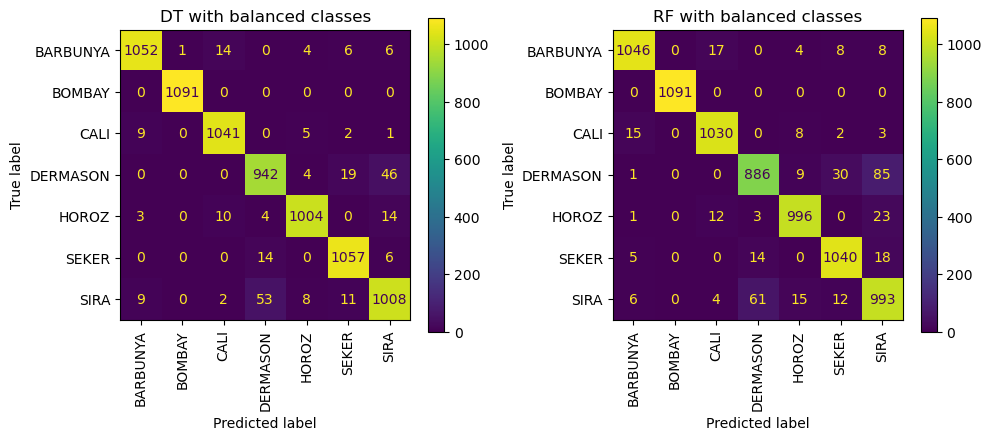

In [57]:
# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 16))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test['Class'])))
disp.plot(ax=axes[0], colorbar = False)
axes[0].set_title('DT with balanced classes')
axes[0].tick_params(axis='x', rotation=90)
plt.colorbar(disp.im_, ax=axes[0], shrink=0.2)

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(cm, display_labels = sorted(set(y_test['Class'])))
disp.plot(ax=axes[1], colorbar = False)
axes[1].set_title('RF with balanced classes')
axes[1].tick_params(axis='x', rotation=90)
plt.colorbar(disp.im_, ax=axes[1], shrink=0.2)

plt.tight_layout()
plt.show()

In [58]:
# Saving optimal random forest with balanced classes
with open('best_rf_clf.pkl', 'wb') as file:
    pickle.dump(best_rf_clf, file)